In [343]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [344]:
df = pd.read_csv('final.csv')
df['Event_start_time'] = pd.to_datetime(df['Event_start_time'] , utc=True)
df

,Unnamed: 0,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,...,Points_Percentage,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time,Weight_Variance
0,0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 05:56:11+00:00,Ryan,7357.0,urination,1,0,2020-09-05,...,0.291447,0.025000,44.299942,44.274942,1,0.025000,44.299942,0.025000,44.299942,2.087515e+05
1,1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 09:41:37+00:00,Ryan,6935.0,urination,1,1,2020-07-18,...,0.470313,0.025000,52.550000,52.525000,2,0.025000,52.550000,52.575000,52.700000,1.586288e+05
2,2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 10:43:43+00:00,Ryan,7357.0,urination,1,0,2020-09-03,...,0.429688,1.374937,45.274949,43.900012,1,1.374937,45.274949,1.374937,45.274949,2.463771e+05
3,3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 07:02:05+00:00,Ryan,6983.0,non_elimination,1,0,2020-09-01,...,0.168675,0.025000,10.849935,10.824935,1,0.025000,10.849935,0.025000,10.849935,1.770790e+06
4,4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 01:47:11+00:00,Ryan,7017.0,urination,1,1,2020-08-08,...,0.596481,0.025000,49.150000,49.125000,1,0.025000,49.150000,0.025000,49.150000,1.221349e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-23 20:36:18+00:00,Sparkler,4116.0,urination,1,0,2021-08-24,...,0.822213,0.025000,48.583258,48.558258,1,0.025000,48.583258,0.025000,48.583258,1.028918e+05
13071,13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 01:29:01+00:00,Sparkler,4604.0,non_elimination,1,0,2021-04-26,...,0.137613,53.392769,71.583398,18.190629,1,53.392769,71.583398,53.392769,71.583398,1.259322e+06
13072,13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-26 22:47:55+00:00,Sparkler,4416.0,urination,1,0,2021-04-27,...,0.565029,0.025000,77.893402,77.868402,1,0.025000,77.893402,0.025000,77.893402,8.579901e+04
13073,13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-01 20:15:57+00:00,Sparkler,4386.0,defecation,1,0,2021-09-02,...,0.948808,0.025000,194.742593,194.717593,1,0.025000,194.742593,0.025000,194.742593,3.478798e+04


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13075 entries, 0 to 13074
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Unnamed: 0              13075 non-null  int64              
 1   Device_ID               13075 non-null  object             
 2   Event_ID                13075 non-null  object             
 3   Event_start_time        13075 non-null  datetime64[ns, UTC]
 4   Name_of_cat             12931 non-null  object             
 5   Weight_of_cat           13075 non-null  float64            
 6   Activity                13072 non-null  object             
 7   Cat_In_Box              13075 non-null  int64              
 8   Synapse_Labeled         13075 non-null  int64              
 9   Event_Date              13075 non-null  object             
 10  Event_start_time_hour   13075 non-null  int64              
 11  Given_Tare_Weight       12062 non-null  f

In [346]:
df = df[df['Activity'].notnull()].reset_index()
#df = df[(df['Device_ID']!='VB00000000000171') & (df['Name_of_cat']!='Azure')].reset_index()
#df = df[df['Name_of_cat'].notnull()]
#df = df[df['Cat_In_Box'] == 1].reset_index()
df['Elimination'] = df['Activity'].apply(lambda x: 0 if(x=='non_elimination') else 1)
df['Urination'] = df['Activity'].apply(lambda x: 1 if(x=='urination') else 0)
df

,index,Unnamed: 0,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,...,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time,Weight_Variance,Elimination,Urination
0,0,0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 05:56:11+00:00,Ryan,7357.0,urination,1,0,...,44.299942,44.274942,1,0.025000,44.299942,0.025000,44.299942,2.087515e+05,1,1
1,1,1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 09:41:37+00:00,Ryan,6935.0,urination,1,1,...,52.550000,52.525000,2,0.025000,52.550000,52.575000,52.700000,1.586288e+05,1,1
2,2,2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 10:43:43+00:00,Ryan,7357.0,urination,1,0,...,45.274949,43.900012,1,1.374937,45.274949,1.374937,45.274949,2.463771e+05,1,1
3,3,3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 07:02:05+00:00,Ryan,6983.0,non_elimination,1,0,...,10.849935,10.824935,1,0.025000,10.849935,0.025000,10.849935,1.770790e+06,0,0
4,4,4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 01:47:11+00:00,Ryan,7017.0,urination,1,1,...,49.150000,49.125000,1,0.025000,49.150000,0.025000,49.150000,1.221349e+05,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13067,13070,13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-23 20:36:18+00:00,Sparkler,4116.0,urination,1,0,...,48.583258,48.558258,1,0.025000,48.583258,0.025000,48.583258,1.028918e+05,1,1
13068,13071,13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 01:29:01+00:00,Sparkler,4604.0,non_elimination,1,0,...,71.583398,18.190629,1,53.392769,71.583398,53.392769,71.583398,1.259322e+06,0,0
13069,13072,13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-26 22:47:55+00:00,Sparkler,4416.0,urination,1,0,...,77.893402,77.868402,1,0.025000,77.893402,0.025000,77.893402,8.579901e+04,1,1
13070,13073,13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-01 20:15:57+00:00,Sparkler,4386.0,defecation,1,0,...,194.742593,194.717593,1,0.025000,194.742593,0.025000,194.742593,3.478798e+04,1,0


In [347]:
#X1 = df[['Sit_Time']]
#[['Name_of_cat', 'Sit_Time', 'Times_Stepped', 'Weight_of_cat']]
#cols = df[['Name_of_cat', 'Sit_Time', 'Weight_of_cat']]

<AxesSubplot:>

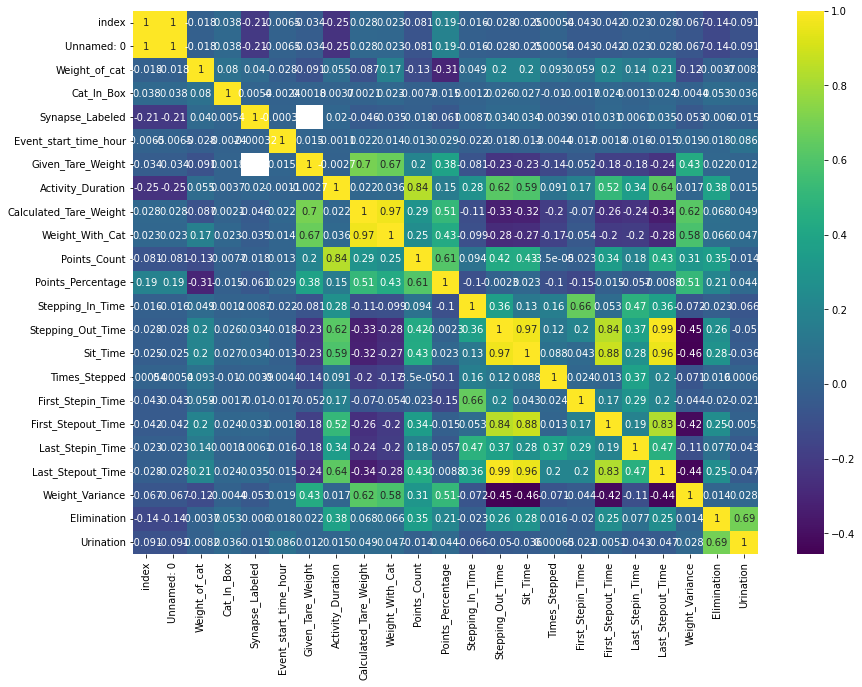

In [348]:
plt.figure(figsize=(14,10))
cor = df.corr()
sns.heatmap(cor, cmap = 'viridis',annot=True)

# First Model

In [349]:
#X1 = df[['Sit_Time']]
#[['Name_of_cat', 'Sit_Time', 'Times_Stepped', 'Weight_of_cat']]
#X1 = df[['Points_Count', 'Points_Percentage', 'Weight_of_cat', 'Stepping_In_Time', 'Weight_Variance', 'Name_of_cat', 'Device_ID']]
X1 = df[['Points_Count', 'Points_Percentage', 'Weight_Variance', 'Weight_of_cat', 'Stepping_In_Time', 'Times_Stepped', 'Event_start_time_hour', 'Name_of_cat']]
#X1 = df[['Points_Percentage', 'Name_of_cat', 'Device_ID']]
y1 = df['Elimination']

In [350]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

ohe = OneHotEncoder()
transformed = ohe.fit_transform(X1[['Name_of_cat']])

X1[ohe.categories_[0]] = transformed.toarray()
X1 = X1.drop(columns = ['Name_of_cat'])

'''ohe = OneHotEncoder()
transformed = ohe.fit_transform(X1[['Device_ID']])

X1[ohe.categories_[0]] = transformed.toarray()
X1 = X1.drop(columns = ['Device_ID'])'''

ohe = OneHotEncoder()
transformed = ohe.fit_transform(X1[['Event_start_time_hour']])

X1[ohe.categories_[0]] = transformed.toarray()
X1 = X1.drop(columns = ['Event_start_time_hour'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [351]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=10)

In [352]:
X1_train

,Points_Count,Points_Percentage,Weight_Variance,Weight_of_cat,Stepping_In_Time,Times_Stepped,Abby,Azure,Betty Lou,Bill,...,14,15,16,17,18,19,20,21,22,23
5003,3825,0.612981,1.667259e+05,5978.0,0.025000,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7484,3094,0.878977,3.003918e+04,3738.0,0.025000,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1906,1258,0.330357,1.334407e+06,4465.0,0.025000,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
93,2894,0.942057,3.220282e+05,5458.0,3.500000,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8567,1268,0.747642,3.872580e+05,5749.0,0.025000,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11633,854,0.179111,4.659296e+05,4619.0,37.535114,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1344,3413,0.586023,3.657306e+04,5039.0,0.025000,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12815,2731,0.870855,1.700406e+05,5780.0,0.025000,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7293,4736,1.000000,4.009779e+06,4009.0,0.000000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [353]:
y1_train.value_counts()

1    7148
0    3309
Name: Elimination, dtype: int64

In [354]:
'''from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=10)
clf1.fit(X1_train, y1_train)'''

'from sklearn.tree import DecisionTreeClassifier\nclf1 = DecisionTreeClassifier(random_state=10)\nclf1.fit(X1_train, y1_train)'

In [355]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators = 100, max_depth = 25, random_state=10)
clf1.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=25, random_state=10)

In [356]:
'''from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=10)
clf1.fit(X1_train, y1_train)'''

'from sklearn.linear_model import LogisticRegression\nclf1 = LogisticRegression(random_state=10)\nclf1.fit(X1_train, y1_train)'

In [357]:
test1_pred = clf1.predict(X1_test)
train1_pred = clf1.predict(X1_train)

In [358]:
#print(clf1.intercept_, clf1.coef_, clf1.score(X1_train, y1_train))

In [359]:
from sklearn.metrics import classification_report

print(classification_report(y1_test, test1_pred))

              precision    recall  f1-score   support

           0       0.93      0.66      0.78       837
           1       0.86      0.98      0.92      1778

    accuracy                           0.88      2615
   macro avg       0.90      0.82      0.85      2615
weighted avg       0.88      0.88      0.87      2615



In [360]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y1_test, test1_pred).ravel()
(tn, fp, fn, tp)

(556, 281, 39, 1739)

In [361]:
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy*100

87.76290630975143

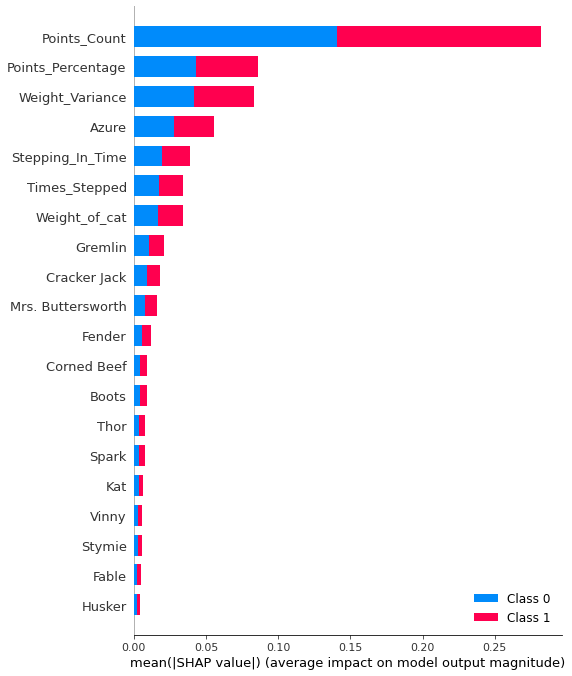

In [362]:
import shap
explainer = shap.TreeExplainer(clf1)
choosen_instance = X1_test
shap_values = explainer.shap_values(choosen_instance, check_additivity=False)
shap.summary_plot(shap_values, X1_train)

# Name of Cat has good impact on model, indicates pattern of Elimination and Non-Elimination

0.8211712111254911


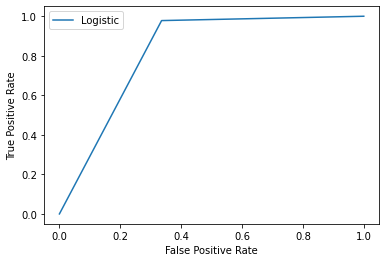

In [363]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

auc = roc_auc_score(y1_test, test1_pred)
print(auc)

fpr, tpr, _ = roc_curve(y1_test, test1_pred)
# plot the roc curve for the model

pyplot.plot(fpr, tpr, label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [364]:
'''# Display plots inline and change default figure size
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
# Train the RandomForestClassifier
# Plot the decision boundary
plot_decision_boundary(lambda x: clf1.predict(X1_test))
plt.title("Random Forest")'''

'# Display plots inline and change default figure size\nimport matplotlib\n%matplotlib inline\nmatplotlib.rcParams[\'figure.figsize\'] = (10.0, 8.0)\n# Train the RandomForestClassifier\n# Plot the decision boundary\nplot_decision_boundary(lambda x: clf1.predict(X1_test))\nplt.title("Random Forest")'

In [365]:
from sklearn.metrics import classification_report

print(classification_report(y1_train, train1_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89      3309
           1       0.92      1.00      0.96      7148

    accuracy                           0.94     10457
   macro avg       0.96      0.90      0.92     10457
weighted avg       0.94      0.94      0.94     10457



In [366]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y1_train, train1_pred).ravel()
(tn, fp, fn, tp)

(2666, 643, 8, 7140)

In [367]:
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy*100

93.77450511619011

# Second Model

In [368]:
X_pred = clf1.predict(X1)

In [369]:
df['Elimination_Pred'] = X_pred
df2 = df[df['Elimination_Pred']==1]

In [370]:
X2 = df2[['Points_Count', 'Points_Percentage', 'Weight_Variance', 'Weight_of_cat', 'Stepping_In_Time', 'Times_Stepped', 'Event_start_time_hour', 'Name_of_cat']]
y2 = df2['Urination']

In [371]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

ohe = OneHotEncoder()
transformed = ohe.fit_transform(X2[['Name_of_cat']])

X2[ohe.categories_[0]] = transformed.toarray()
X2 = X2.drop(columns = ['Name_of_cat'])

ohe = OneHotEncoder()
transformed = ohe.fit_transform(X2[['Event_start_time_hour']])

X2[ohe.categories_[0]] = transformed.toarray()
X2 = X2.drop(columns = ['Event_start_time_hour'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [372]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=20)

In [373]:
'''from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(random_state=20)
clf2.fit(X2_train, y2_train)'''

'from sklearn.linear_model import LogisticRegression\nclf2 = LogisticRegression(random_state=20)\nclf2.fit(X2_train, y2_train)'

In [374]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators = 100, max_depth = 20, random_state=20)
clf2.fit(X2_train, y2_train)

RandomForestClassifier(max_depth=20, random_state=20)

In [375]:
test2_pred = clf2.predict(X2_test)
train2_pred = clf2.predict(X2_train)

In [376]:
from sklearn.metrics import classification_report

print(classification_report(y2_test, test2_pred))

              precision    recall  f1-score   support

           0       0.75      0.59      0.66       630
           1       0.82      0.91      0.86      1331

    accuracy                           0.81      1961
   macro avg       0.79      0.75      0.76      1961
weighted avg       0.80      0.81      0.80      1961



In [377]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y2_test, test2_pred).ravel()
(tn, fp, fn, tp)

(372, 258, 123, 1208)

In [378]:
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy*100

80.57113717491076

In [379]:
from sklearn.metrics import classification_report

print(classification_report(y2_train, train2_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2606
           1       0.90      0.98      0.94      5236

    accuracy                           0.92      7842
   macro avg       0.93      0.88      0.90      7842
weighted avg       0.92      0.92      0.91      7842



In [380]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y2_train, train2_pred).ravel()
(tn, fp, fn, tp)

(2038, 568, 94, 5142)

In [381]:
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy*100

91.55827595001274

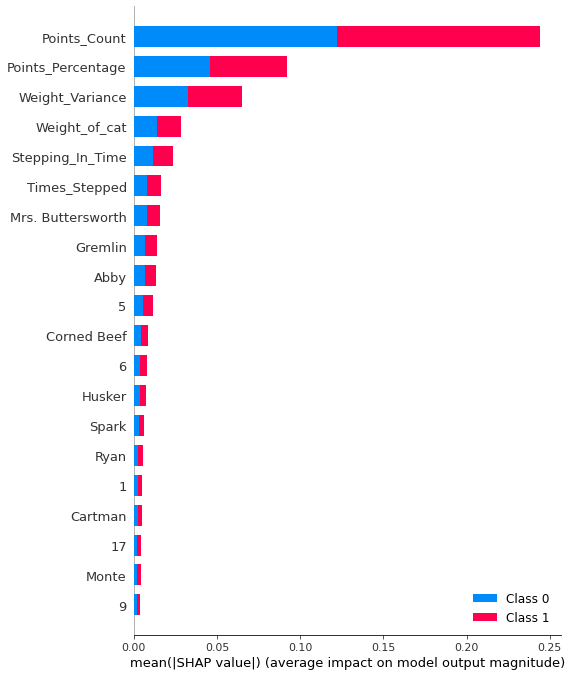

In [382]:
import shap
explainer = shap.TreeExplainer(clf2)
choosen_instance = X2_test
shap_values = explainer.shap_values(choosen_instance, check_additivity=False)
shap.summary_plot(shap_values, X2_train)

# Event_start_time_hour has good impact on model, indicates model used time for classification between Urination and Defecation